/Users/chris/Documents/brainflow/PhysioAnalyze.py:19: RuntimeWarning: This filename (data/crawford_events2.txt) does not conform to MNE naming conventions. All events files should end with .eve, -eve.fif, -eve.fif.gz, -eve.lst, -eve.txt, _eve.fif, _eve.fif.gz, _eve.lst, _eve.txt or -annot.fif
  self.events = mne.read_events(eventFile)


Creating RawArray with float64 data, n_channels=1, n_times=94405
    Range : 0 ... 94404 =      0.000 ...   472.020 secs
Ready.


(<Figure size 597.6x432 with 1 Axes>, <AxesSubplot:>)

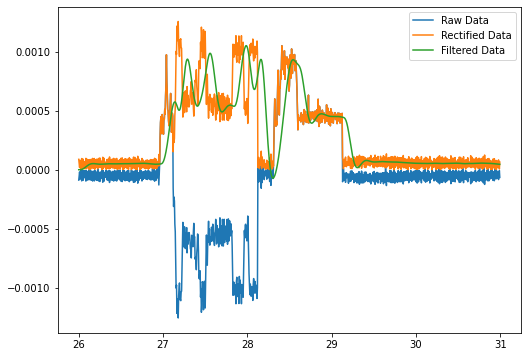

In [1]:
from PhysioAnalyze import Study
from PhysioVisualize import plotBasic, plotMulti
from PhysioGoDSP import butter_lowpass, rectify


# Create labels for events (optional)
event_mapping = {'Rest': 100, 'Lift': 99, 'Squeeze': 98}

sFreq = 200 # sampling frequency

# Create Physio Study
study = Study(1, "emg", sFreq, event_mapping, eventFile="data/crawford_events2.txt")

# Read raw csv file
study.readFile("data/crawford_EMG_Test.csv", 1, 2)

# Get start time for the 4th event
start = study.getEventTime(4)

# Get 5 second epoch
data, times = study.getEpoch(start, 5)

rawData = data[0]

rectifiedData = rectify(rawData)

filteredData = butter_lowpass(rectifiedData, 5, sFreq, order=4)

plotMulti([rawData, rectifiedData, filteredData], ['Raw Data', 'Rectified Data', 'Filtered Data'], times, [8.3, 6])
